In [1]:
import astropy.io.fits as fits
import numpy as np
from scipy.integrate import quad
import scipy.integrate as integrate
from scipy.optimize import curve_fit
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import Table, join
import os
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
import halomod as hm
import hmf
import treecorr

/home/astro/manasoi7/.conda/envs/project/lib/python3.12/site-packages/halomod/halo_model.py:32: UserWarning: Warning: Some Halo-Exclusion models have significant speedup when using Numba
  from .halo_exclusion import NoExclusion


In [2]:
import DarkVerse as dv


In [3]:

# Define the home directory
home_dir = os.path.expanduser('~')
thesis_path = os.path.join(home_dir, 'Master_Thesis', 'DATA')

# Load Catalog Data
fits_file_path = os.path.join(thesis_path, "Y3_deep_fields_DB_wKNN_cat_COSMOS_zm.fits")  
t = Table.read(fits_file_path)

masked_file_path = os.path.join(thesis_path, "COSMOS_masked_cat.fits")  
t3 = Table.read(masked_file_path)

# Join tables on 'id'
t = join(t, t3, keys='id')
t.rename_column('ra_1', 'ra')
t.rename_column('dec_1', 'dec')

# Load Randoms
fits_random = os.path.join(thesis_path, "COSMOS_randoms_ugriz_trim_video.fits") 
t2 = Table.read(fits_random)
randoms = t2  # Random catalog

# Define Correlation Function Configuration
config = {
    'min_sep': 0.003,
    'max_sep': 1.78,
    'bin_size': 0.1,
    'sep_units': 'degrees',
    'var_method': 'bootstrap'
}

z_min=0.1
z_max=0.2
SM_min=10
SM_max=11

# Select Subsample
subsample = dv.Subsample(catalog=t, randoms=randoms, z_min=z_min, z_max=z_max, SM_min=SM_min, SM_max=SM_max, config=config)

# Get Results
results = subsample.get_results()

print(f"Power Law Parameters (A, gamma): {results['power_law_params']}")
print()
#print(f"w_theta: {results['w_theta']}")
#print(f"DD counts: {results['dd_counts']}")
#print(f"DR counts: {results['dr_counts']}")
#print(f"RR counts: {results['rr_counts']}")


The following patch numbers have no objects: {1, 10, 42, 12, 14, 48, 17, 20, 23, 26}
This may be a problem depending on your use case.


/home/astro/manasoi7/.conda/envs/project/lib/python3.12/site-packages/hmf/density_field/transfer_models.py:233: UserWarning: 'extrapolate_with_eh' was not set. Defaulting to True, which is different behaviour than versions <=3.4.4. This warning may be removed in v4.0. Silence it by setting extrapolate_with_eh explicitly.
  warnings.warn(
/home/astro/manasoi7/.conda/envs/project/lib/python3.12/site-packages/halomod/halo_model.py:784: UserWarning: You are using an un-normalized mass function and bias function pair.Bias Tinker10 has the following paired HMF model: (). Matter correlations are not well-defined.
  tools.norm_warn(self)


Power Law Parameters (A, gamma): [-0.01369544  0.80239403]



Errors on w_theta: [ 0.47023796  0.42647177  0.45073043  0.44245409  0.45460791  0.44905075
  0.42505079  0.44468749  0.45462363  0.44272533  0.44409855  0.44104314
  0.44448123  0.45502405  0.45131095  0.45055333  0.44542199  0.47716327
  3.28227458  0.46964208  0.44953072  0.43909095  0.43857071  0.42569544
  0.43620786  2.0824693   1.46257556  1.30107012  1.71724928  0.82582465
  1.2002774   0.90715729  0.87516099  0.87507285  0.62568375  0.56076828
  0.72334485  0.77654986  0.57541275  0.47960949  0.57992742  0.49570661
  0.48060082  0.36375769  0.37812561  0.33481316  0.33786902  0.26645723
  0.28598847  0.26207468  0.26652221  0.24806523  0.22168475  0.21586331
  0.20447483  0.21891226  0.18314763  0.22965513  0.20924468  0.2172092
  0.24675978  0.34066325  1.34652613 51.46456377]


/tmp/ipykernel_2993647/2901281716.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


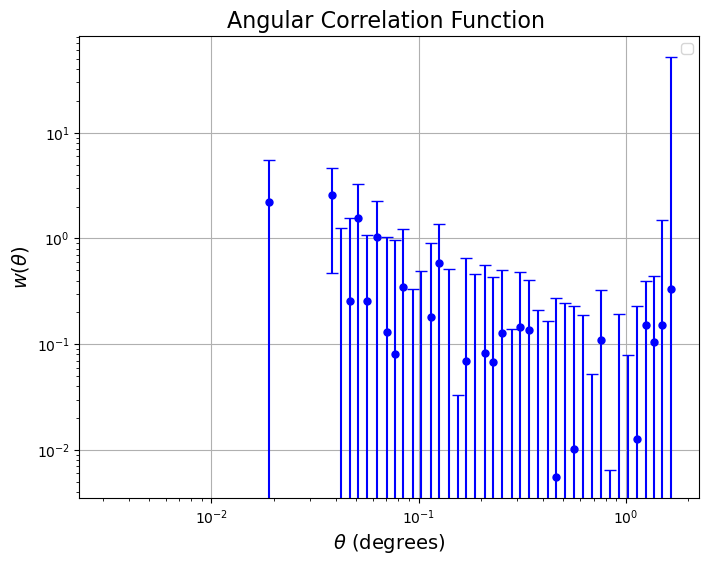

In [4]:

theta_values = results['theta']
w_theta_values = results['w_theta']
var_w_theta_values = results['var_w_theta']

# Compute errors (standard deviation)
w_theta_errors = np.sqrt(var_w_theta_values)

print("Errors on w_theta:", w_theta_errors)


plt.figure(figsize=(8, 6))
plt.errorbar(theta_values, w_theta_values, yerr= w_theta_errors, fmt='o', color='blue', capsize=4, markersize=5)

plt.xlabel(r'$\theta$ (degrees)', fontsize=14)
plt.ylabel(r'$w(\theta)$', fontsize=14)
plt.title('Angular Correlation Function ', fontsize=16)

plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.grid(True)
plt.show()


### ^these errors are way too big wtf is going on??

In [18]:
gg = subsample.compute_gg()  



In [19]:
print(f"xi g: {results['xi_g']}")


xi g: [5.42058392 5.01435193 4.62452525 4.25183483 3.89691044 3.56026415
 3.24227971 2.94320397 2.66313575 2.40202567 2.1596781  1.93575454
 1.72978407 1.54117201 1.36922043 1.21315279 1.07207677 0.94497632
 0.83086977 0.72882983 0.63788501 0.55704786 0.48526208 0.42156822
 0.36481757 0.31371636 0.2684493  0.22920206 0.19583005 0.16802421
 0.14536296 0.12753806 0.11384516 0.10327637 0.09502591 0.0884627
 0.08309939 0.07856633 0.07458934 0.0709708  0.06757327 0.06430543
 0.06111012 0.05795465 0.05482304 0.05171041 0.04861895 0.04555517
 0.04252797 0.03954752 0.03662472 0.03377061 0.03099604 0.0283115
 0.02572689 0.02325151 0.02089376 0.01866098 0.01655924 0.01459335
 0.0127668  0.01108166 0.00953848 0.00813637]


In [20]:


# Compute correlation functions
theta, xi_g, xi_m = subsample.compute_gg()

# Retrieve all results
results = subsample.get_results()

# Print key outputs
print("Galaxy-Galaxy Angular Correlation:", results['xi_g'])
print("Matter-Matter Angular Correlation:", results['xi_m'])


Galaxy-Galaxy Angular Correlation: [16.74735464 15.73685911 14.75002014 13.78887741 12.85545814 11.95174333
 11.07963212 10.2409051   9.43718794  8.6699163   7.9403028   7.24930363
  6.59759566  5.98556439  5.41328941  4.88053873  4.38678233  3.93119938
  3.51270466  3.12997095  2.78146211  2.46548403  2.18019877  1.9235473
  1.69341963  1.48781368  1.30477111  1.14224192  0.99824255  0.87073154
  0.75777449  0.65689441  0.56700168  0.4882281   0.42028633  0.36260565
  0.31443255  0.27501078  0.24377776  0.21925086  0.19986158  0.18435555
  0.17173802  0.16122839  0.15222238  0.14426046  0.13700133  0.13019905
  0.12368324  0.11734199  0.11110712  0.10494221  0.09883319  0.09278101
  0.08679603  0.08089415  0.07509447  0.06941774  0.06388511  0.05851746
  0.05333481  0.04835613  0.04359897  0.03907891]
Matter-Matter Angular Correlation: [1.52106736 1.49817397 1.47390665 1.44823412 1.42113266 1.39258654
 1.36258871 1.33114196 1.29826043 1.26397116 1.22831523 1.19134606
 1.15313069 1.113

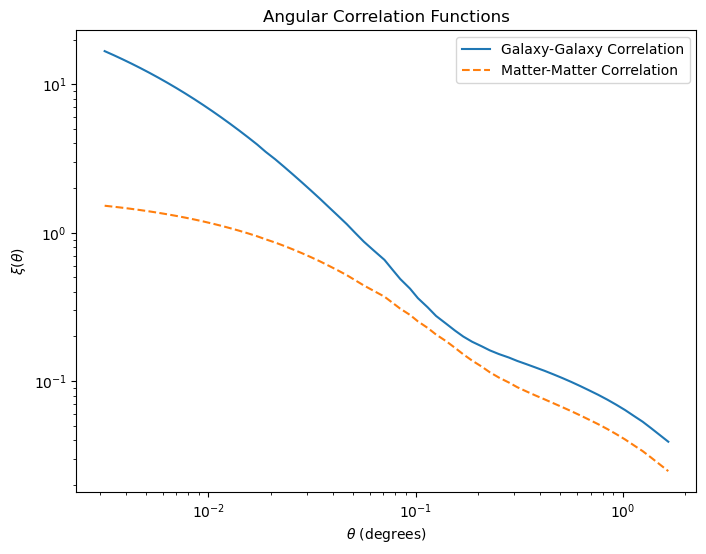

In [21]:
plt.figure(figsize=(8,6))
plt.loglog(results['theta'], results['xi_g'], label='Galaxy-Galaxy Correlation')
plt.loglog(results['theta'], results['xi_m'], label='Matter-Matter Correlation', linestyle='dashed')

plt.xlabel(r'$\theta$ (degrees)')
plt.ylabel(r'$\xi(\theta)$')
plt.legend()
plt.title('Angular Correlation Functions')
plt.show()


Errors on w_theta: [ 0.47023796  0.42647177  0.45073043  0.44245409  0.45460791  0.44905075
  0.42505079  0.44468749  0.45462363  0.44272533  0.44409855  0.44104314
  0.44448123  0.45502405  0.45131095  0.45055333  0.44542199  0.47716327
  3.28227458  0.46964208  0.44953072  0.43909095  0.43857071  0.42569544
  0.43620786  2.0824693   1.46257556  1.30107012  1.71724928  0.82582465
  1.2002774   0.90715729  0.87516099  0.87507285  0.62568375  0.56076828
  0.72334485  0.77654986  0.57541275  0.47960949  0.57992742  0.49570661
  0.48060082  0.36375769  0.37812561  0.33481316  0.33786902  0.26645723
  0.28598847  0.26207468  0.26652221  0.24806523  0.22168475  0.21586331
  0.20447483  0.21891226  0.18314763  0.22965513  0.20924468  0.2172092
  0.24675978  0.34066325  1.34652613 51.46456377]


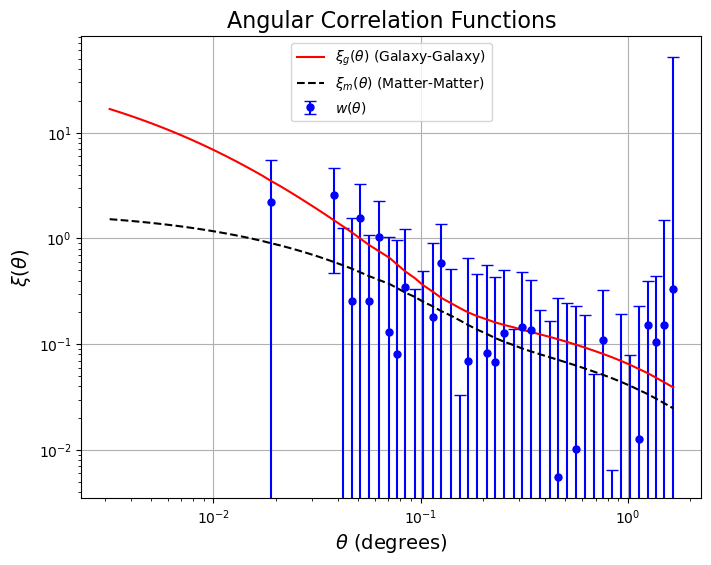

In [22]:

theta_values = results['theta']
w_theta_values = results['w_theta']
var_w_theta_values = results['var_w_theta']
xi_g_values = results['xi_g']
xi_m_values = results['xi_m']

# Compute errors (standard deviation)
w_theta_errors = np.sqrt(var_w_theta_values)

print("Errors on w_theta:", w_theta_errors)

# Create figure
plt.figure(figsize=(8, 6))

# Plot w(theta) with error bars
plt.errorbar(theta_values, w_theta_values, yerr=w_theta_errors, fmt='o', 
             color='blue', capsize=4, markersize=5, label=r'$w(\theta)$')

# Plot galaxy and matter correlation functions
plt.plot(theta_values, xi_g_values, label=r'$\xi_{g}(\theta)$ (Galaxy-Galaxy)', linestyle='-', color='red')
plt.plot(theta_values, xi_m_values, label=r'$\xi_{m}(\theta)$ (Matter-Matter)', linestyle='dashed', color='black')

# Log-log scales
plt.xscale('log')
plt.yscale('log')

# Labels and title
plt.xlabel(r'$\theta$ (degrees)', fontsize=14)
plt.ylabel(r'$\xi(\theta)$', fontsize=14)
plt.title('Angular Correlation Functions', fontsize=16)

# Add legend and grid
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [7]:
mask = (theta_values >= 0.1) & (theta_values <= 0.4)


In [8]:
bias_est= dv.BiasEstimator(gg.angular_corr_gal, w_theta_values, w_theta_errors, results['rr_counts'], mask)

AttributeError: 'tuple' object has no attribute 'angular_corr_gal'